## Data Science and Business Analytics Intern
##                   


## Task 1 - Prediction using Supervised ML


### Problem statement- *Predict the percentage of an student based on the no. of study hours.*
It is a simple linear regression task involving two features. Dataset can be found at http://bit.ly/w-data

##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#setting default seaborn  for plots
sns.set()

##### Loading dataset

In [2]:
data_set = pd.read_csv("http://bit.ly/w-data")

##### Exploratory data analysis

In [3]:
# Displaying top 5 records
data_set.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data_set.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
data_set.describe()
# Here we can see the there are total of 25 record with 2 features

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Checking for null values
data_set.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data_set.corr()
#Correlation means association - more precisely it is a measure of the extent to which two variables are related. 
#Here, we can also observe that they both features are positively correlated 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visualization

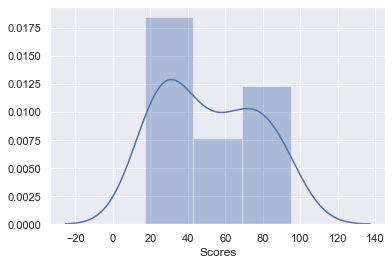

In [9]:
sns.distplot(data_set['Scores'])

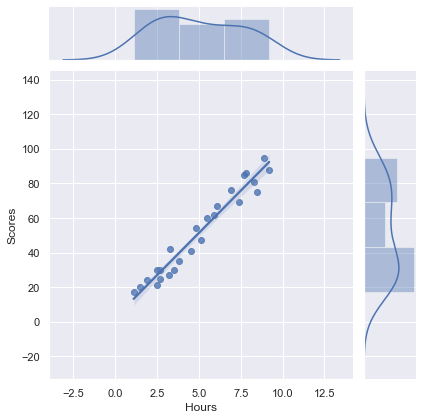

In [10]:
sns.jointplot(x=data_set['Hours'] , y=data_set['Scores'], data = data_set , kind='reg')

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

### **Preparing the data**

In [11]:
X = data_set.iloc[:, :-1].values  
y = data_set.iloc[:, 1].values 

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Intercept: ' , regressor.intercept_)

Intercept:  2.512129298320083


In [15]:
print('Coefficient : ', regressor.coef_)

#This implies that for every one unit change in hour studies the change in the score is about 9.73%.

Coefficient :  [9.73330705]


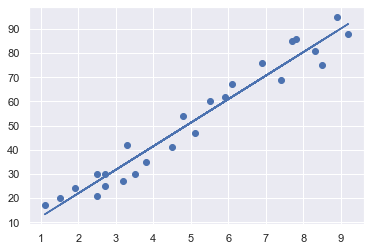

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
print(X_test) # Testing data - In Hours

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [18]:
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

In [19]:
#Comparing the Results
res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
res 

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


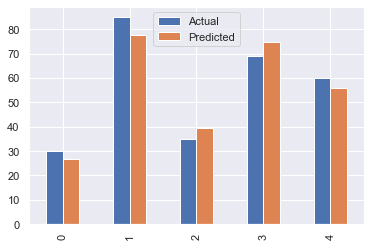

In [20]:
#Visualization of our result
res.plot(kind='bar') 

#### We see that our predictions are reasonably similar to the actual values

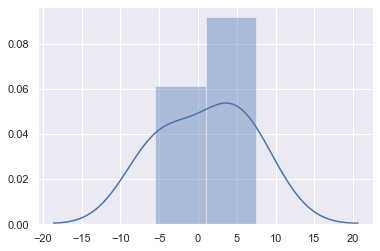

In [21]:
#Residuals
sns.distplot(np.array(y_test-y_pred))

### Evaluating the model

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sqaured Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Sqaured Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.937597792467705
Mean Sqaured Error: 26.675642597052235
Root Mean Sqaured Error: 5.164846812544612
R-2 0.9377551740781869


#### R-sqaured gives us the goodness of fit and here we can obsserve that here it is 93.77%.
